In [1]:
from os import listdir
from numpy import asarray, load
from numpy import vstack
from keras.utils import img_to_array
from keras.utils import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [26]:
def load_images(path, size=(256, 512)):
    src_list, tar_list = list(), list()
    for filename in listdir(path):
        pixels = load_img(path + filename, target_size=size)
        pixels = img_to_array(pixels)
        sat_img, map_img = pixels[:,:256], pixels[:,256:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    return[asarray(src_list), asarray(tar_list)]

In [27]:
path = 'maps/train/'
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


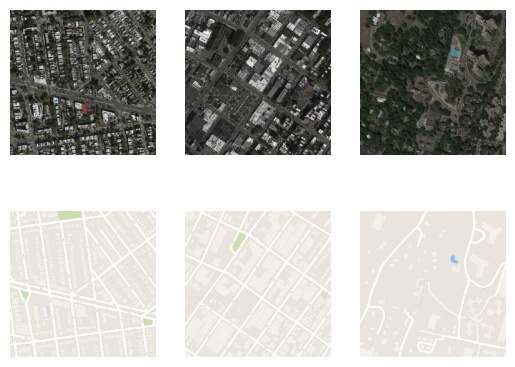

In [28]:
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

In [29]:
from pix2pixmodel2 import define_discriminator, define_generator, define_gan, train
image_shape = src_images.shape[1:]
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)
data = [src_images, tar_images]

C:\Users\rutur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
C:\Users\rutur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
def preprocess_data(data):
    X1, X2 = data[0], data[1]
    X1 = (X1 - 127.5)/127.5
    X2 = (X2 - 127.5)/127.5
    return [X1, X2]

In [31]:
data = preprocess_data(data)

In [32]:
from datetime import datetime
start1 = datetime.now()
train(d_model, g_model, gan_model, data, n_epochs=10, n_batch=1)
stop1 = datetime.now()
execution_time = stop1 - start1
print(execution_time)

1/1 [==============================] - 12s 12s/step
>1, d1[0.238] d2[1.060] g[83.214]
1/1 [==============================] - 0s 97ms/step
>2, d1[0.188] d2[0.756] g[77.029]
1/1 [==============================] - 0s 39ms/step
>3, d1[0.264] d2[0.615] g[77.533]
1/1 [==============================] - 0s 61ms/step
>4, d1[0.388] d2[0.616] g[70.607]
1/1 [==============================] - 0s 55ms/step
>5, d1[0.368] d2[0.505] g[66.996]
1/1 [==============================] - 0s 64ms/step
>6, d1[0.216] d2[0.487] g[54.752]
1/1 [==============================] - 0s 68ms/step
>7, d1[0.572] d2[0.568] g[56.432]
1/1 [==============================] - 0s 49ms/step
>8, d1[0.299] d2[0.771] g[49.389]
1/1 [==============================] - 0s 86ms/step
>9, d1[0.482] d2[0.434] g[61.027]
1/1 [==============================] - 0s 68ms/step
>10, d1[0.350] d2[0.309] g[60.081]
1/1 [==============================] - 0s 50ms/step
>11, d1[0.206] d2[0.315] g[55.196]
1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 50ms/step
>188, d1[0.030] d2[0.097] g[13.185]
1/1 [==============================] - 0s 40ms/step
>189, d1[0.017] d2[0.074] g[18.273]
1/1 [==============================] - 0s 40ms/step
>190, d1[0.705] d2[0.129] g[9.567]
1/1 [==============================] - 0s 52ms/step
>191, d1[0.006] d2[0.402] g[19.974]
1/1 [==============================] - 0s 48ms/step
>192, d1[0.186] d2[0.099] g[10.016]
1/1 [==============================] - 0s 37ms/step
>193, d1[0.856] d2[0.439] g[10.919]
1/1 [==============================] - 0s 55ms/step
>194, d1[0.241] d2[0.348] g[10.587]
1/1 [==============================] - 0s 46ms/step
>195, d1[0.193] d2[0.357] g[9.574]
1/1 [==============================] - 0s 44ms/step
>196, d1[0.912] d2[0.130] g[9.244]
1/1 [==============================] - 0s 50ms/step
>197, d1[0.733] d2[0.209] g[6.223]
1/1 [==============================] - 0s 46ms/step
>198, d1[0.092] d2[0.260] g[10.082]
1/1 [==============================]

1/1 [==============================] - 0s 51ms/step
>374, d1[0.365] d2[0.078] g[15.774]
1/1 [==============================] - 0s 48ms/step
>375, d1[0.552] d2[0.228] g[9.185]
1/1 [==============================] - 0s 56ms/step
>376, d1[0.399] d2[0.392] g[8.604]
1/1 [==============================] - 0s 56ms/step
>377, d1[0.029] d2[0.330] g[10.260]
1/1 [==============================] - 0s 47ms/step
>378, d1[0.024] d2[0.110] g[16.491]
1/1 [==============================] - 0s 45ms/step
>379, d1[0.485] d2[0.178] g[10.069]
1/1 [==============================] - 0s 53ms/step
>380, d1[0.404] d2[0.226] g[10.840]
1/1 [==============================] - 0s 45ms/step
>381, d1[0.009] d2[0.191] g[14.505]
1/1 [==============================] - 0s 52ms/step
>382, d1[0.282] d2[0.199] g[9.353]
1/1 [==============================] - 0s 57ms/step
>383, d1[0.132] d2[0.166] g[9.671]
1/1 [==============================] - 0s 47ms/step
>384, d1[0.616] d2[0.829] g[11.105]
1/1 [==============================]

1/1 [==============================] - 0s 63ms/step
>560, d1[0.185] d2[0.131] g[10.367]
1/1 [==============================] - 0s 45ms/step
>561, d1[0.169] d2[0.368] g[8.359]
1/1 [==============================] - 0s 50ms/step
>562, d1[0.004] d2[0.058] g[17.456]
1/1 [==============================] - 0s 50ms/step
>563, d1[0.169] d2[0.130] g[8.983]
1/1 [==============================] - 0s 50ms/step
>564, d1[0.058] d2[0.192] g[10.299]
1/1 [==============================] - 0s 53ms/step
>565, d1[0.196] d2[0.086] g[11.177]
1/1 [==============================] - 0s 52ms/step
>566, d1[0.052] d2[0.160] g[9.373]
1/1 [==============================] - 0s 45ms/step
>567, d1[0.009] d2[0.060] g[15.253]
1/1 [==============================] - 0s 50ms/step
>568, d1[0.002] d2[0.072] g[24.695]
1/1 [==============================] - 0s 50ms/step
>569, d1[0.071] d2[0.088] g[11.296]
1/1 [==============================] - 0s 49ms/step
>570, d1[0.006] d2[0.045] g[16.720]
1/1 [==============================

1/1 [==============================] - 0s 24ms/step
>746, d1[0.039] d2[0.045] g[14.316]
1/1 [==============================] - 0s 25ms/step
>747, d1[0.071] d2[0.116] g[11.440]
1/1 [==============================] - 0s 21ms/step
>748, d1[0.003] d2[0.083] g[20.948]
1/1 [==============================] - 0s 21ms/step
>749, d1[0.003] d2[0.113] g[16.281]
1/1 [==============================] - 0s 22ms/step
>750, d1[0.791] d2[0.155] g[11.103]
1/1 [==============================] - 0s 25ms/step
>751, d1[0.134] d2[0.375] g[12.802]
1/1 [==============================] - 0s 22ms/step
>752, d1[0.509] d2[0.084] g[10.532]
1/1 [==============================] - 0s 20ms/step
>753, d1[0.446] d2[0.066] g[16.271]
1/1 [==============================] - 0s 22ms/step
>754, d1[0.015] d2[0.117] g[13.327]
1/1 [==============================] - 0s 21ms/step
>755, d1[0.085] d2[0.159] g[8.821]
1/1 [==============================] - 0s 21ms/step
>756, d1[0.072] d2[0.138] g[9.255]
1/1 [=============================

1/1 [==============================] - 0s 21ms/step
>932, d1[0.093] d2[0.247] g[9.279]
1/1 [==============================] - 0s 20ms/step
>933, d1[0.000] d2[0.076] g[15.011]
1/1 [==============================] - 0s 22ms/step
>934, d1[0.060] d2[0.073] g[9.905]
1/1 [==============================] - 0s 20ms/step
>935, d1[0.009] d2[0.043] g[23.991]
1/1 [==============================] - 0s 21ms/step
>936, d1[0.197] d2[0.206] g[10.910]
1/1 [==============================] - 0s 25ms/step
>937, d1[0.010] d2[0.128] g[11.562]
1/1 [==============================] - 0s 21ms/step
>938, d1[0.002] d2[0.045] g[20.468]
1/1 [==============================] - 0s 22ms/step
>939, d1[0.002] d2[0.050] g[21.204]
1/1 [==============================] - 0s 22ms/step
>940, d1[0.430] d2[0.170] g[9.809]
1/1 [==============================] - 0s 23ms/step
>941, d1[0.042] d2[0.169] g[10.792]
1/1 [==============================] - 0s 21ms/step
>942, d1[0.006] d2[0.170] g[17.529]
1/1 [==============================

1/1 [==============================] - 0s 21ms/step
>1117, d1[0.759] d2[0.198] g[13.529]
1/1 [==============================] - 0s 21ms/step
>1118, d1[0.136] d2[0.502] g[10.217]
1/1 [==============================] - 0s 21ms/step
>1119, d1[0.060] d2[0.048] g[11.277]
1/1 [==============================] - 0s 20ms/step
>1120, d1[0.134] d2[0.132] g[15.481]
1/1 [==============================] - 0s 22ms/step
>1121, d1[0.137] d2[0.070] g[12.031]
1/1 [==============================] - 0s 22ms/step
>1122, d1[0.064] d2[0.107] g[8.470]
1/1 [==============================] - 0s 20ms/step
>1123, d1[0.037] d2[0.114] g[11.218]
1/1 [==============================] - 0s 20ms/step
>1124, d1[0.425] d2[0.293] g[8.279]
1/1 [==============================] - 0s 21ms/step
>1125, d1[0.058] d2[0.101] g[15.873]
1/1 [==============================] - 0s 20ms/step
>1126, d1[0.078] d2[0.132] g[9.886]
1/1 [==============================] - 0s 20ms/step
>1127, d1[0.157] d2[0.125] g[10.818]
1/1 [===================

1/1 [==============================] - 0s 20ms/step
>1301, d1[0.294] d2[0.255] g[10.393]
1/1 [==============================] - 0s 22ms/step
>1302, d1[0.038] d2[0.130] g[9.444]
1/1 [==============================] - 0s 20ms/step
>1303, d1[0.054] d2[0.034] g[11.481]
1/1 [==============================] - 0s 20ms/step
>1304, d1[0.005] d2[0.079] g[14.163]
1/1 [==============================] - 0s 22ms/step
>1305, d1[0.079] d2[0.069] g[14.999]
1/1 [==============================] - 0s 22ms/step
>1306, d1[0.001] d2[0.152] g[16.241]
1/1 [==============================] - 0s 21ms/step
>1307, d1[0.061] d2[0.066] g[12.410]
1/1 [==============================] - 0s 20ms/step
>1308, d1[1.144] d2[0.204] g[8.377]
1/1 [==============================] - 0s 21ms/step
>1309, d1[0.083] d2[0.853] g[11.604]
1/1 [==============================] - 0s 21ms/step
>1310, d1[0.316] d2[0.162] g[9.157]
1/1 [==============================] - 0s 21ms/step
>1311, d1[0.559] d2[0.077] g[14.178]
1/1 [===================

1/1 [==============================] - 0s 21ms/step
>1485, d1[0.280] d2[0.330] g[11.382]
1/1 [==============================] - 0s 21ms/step
>1486, d1[0.007] d2[0.061] g[14.523]
1/1 [==============================] - 0s 27ms/step
>1487, d1[0.012] d2[0.089] g[21.543]
1/1 [==============================] - 0s 20ms/step
>1488, d1[0.043] d2[0.148] g[16.522]
1/1 [==============================] - 0s 21ms/step
>1489, d1[0.003] d2[0.037] g[22.061]
1/1 [==============================] - 0s 21ms/step
>1490, d1[0.485] d2[0.179] g[9.139]
1/1 [==============================] - 0s 20ms/step
>1491, d1[0.083] d2[0.060] g[11.475]
1/1 [==============================] - 0s 23ms/step
>1492, d1[0.001] d2[0.079] g[14.157]
1/1 [==============================] - 0s 23ms/step
>1493, d1[0.315] d2[0.143] g[7.750]
1/1 [==============================] - 0s 20ms/step
>1494, d1[0.046] d2[0.076] g[13.356]
1/1 [==============================] - 0s 24ms/step
>1495, d1[0.086] d2[0.916] g[23.312]
1/1 [==================

1/1 [==============================] - 0s 21ms/step
>1669, d1[0.226] d2[0.232] g[14.561]
1/1 [==============================] - 0s 21ms/step
>1670, d1[0.127] d2[0.291] g[8.948]
1/1 [==============================] - 0s 20ms/step
>1671, d1[0.000] d2[0.105] g[13.039]
1/1 [==============================] - 0s 22ms/step
>1672, d1[0.111] d2[0.211] g[8.500]
1/1 [==============================] - 0s 20ms/step
>1673, d1[0.485] d2[0.083] g[9.318]
1/1 [==============================] - 0s 20ms/step
>1674, d1[0.010] d2[0.512] g[12.123]
1/1 [==============================] - 0s 21ms/step
>1675, d1[0.038] d2[0.083] g[9.235]
1/1 [==============================] - 0s 22ms/step
>1676, d1[0.007] d2[0.098] g[15.781]
1/1 [==============================] - 0s 24ms/step
>1677, d1[0.211] d2[0.123] g[11.323]
1/1 [==============================] - 0s 26ms/step
>1678, d1[0.001] d2[0.084] g[13.641]
1/1 [==============================] - 0s 21ms/step
>1679, d1[0.002] d2[0.129] g[13.402]
1/1 [====================

1/1 [==============================] - 0s 22ms/step
>1853, d1[0.031] d2[0.053] g[11.645]
1/1 [==============================] - 0s 24ms/step
>1854, d1[0.001] d2[0.039] g[15.029]
1/1 [==============================] - 0s 24ms/step
>1855, d1[0.764] d2[0.212] g[8.030]
1/1 [==============================] - 0s 30ms/step
>1856, d1[0.001] d2[0.101] g[10.538]
1/1 [==============================] - 0s 21ms/step
>1857, d1[0.018] d2[0.383] g[15.902]
1/1 [==============================] - 0s 22ms/step
>1858, d1[0.350] d2[0.370] g[9.212]
1/1 [==============================] - 0s 22ms/step
>1859, d1[0.035] d2[0.057] g[8.963]
1/1 [==============================] - 0s 20ms/step
>1860, d1[0.365] d2[0.090] g[13.078]
1/1 [==============================] - 0s 21ms/step
>1861, d1[0.219] d2[0.252] g[10.316]
1/1 [==============================] - 0s 22ms/step
>1862, d1[0.021] d2[0.101] g[13.686]
1/1 [==============================] - 0s 22ms/step
>1863, d1[0.080] d2[0.241] g[9.504]
1/1 [====================

>2037, d1[0.237] d2[0.370] g[8.686]
1/1 [==============================] - 0s 25ms/step
>2038, d1[0.316] d2[0.228] g[8.549]
1/1 [==============================] - 0s 25ms/step
>2039, d1[0.034] d2[0.067] g[8.542]
1/1 [==============================] - 0s 22ms/step
>2040, d1[0.003] d2[0.085] g[14.486]
1/1 [==============================] - 0s 28ms/step
>2041, d1[0.401] d2[0.179] g[7.916]
1/1 [==============================] - 0s 21ms/step
>2042, d1[0.076] d2[0.172] g[8.429]
1/1 [==============================] - 0s 21ms/step
>2043, d1[0.001] d2[0.090] g[18.363]
1/1 [==============================] - 0s 21ms/step
>2044, d1[0.001] d2[0.080] g[22.971]
1/1 [==============================] - 0s 21ms/step
>2045, d1[0.063] d2[0.093] g[9.284]
1/1 [==============================] - 0s 21ms/step
>2046, d1[0.014] d2[0.050] g[16.387]
1/1 [==============================] - 0s 21ms/step
>2047, d1[0.002] d2[0.051] g[15.920]
1/1 [==============================] - 0s 21ms/step
>2048, d1[0.062] d2[0.145] 

1/1 [==============================] - 0s 24ms/step
>2222, d1[0.003] d2[0.042] g[15.175]
1/1 [==============================] - 0s 24ms/step
>2223, d1[1.028] d2[0.263] g[12.325]
1/1 [==============================] - 0s 21ms/step
>2224, d1[0.004] d2[0.086] g[12.961]
1/1 [==============================] - 0s 22ms/step
>2225, d1[0.003] d2[0.034] g[14.208]
1/1 [==============================] - 0s 23ms/step
>2226, d1[0.008] d2[0.031] g[13.017]
1/1 [==============================] - 0s 20ms/step
>2227, d1[0.876] d2[0.054] g[10.974]
1/1 [==============================] - 0s 22ms/step
>2228, d1[0.174] d2[0.215] g[8.164]
1/1 [==============================] - 0s 20ms/step
>2229, d1[0.003] d2[0.156] g[10.878]
1/1 [==============================] - 0s 21ms/step
>2230, d1[0.003] d2[0.139] g[16.147]
1/1 [==============================] - 0s 26ms/step
>2231, d1[0.151] d2[0.057] g[7.970]
1/1 [==============================] - 0s 24ms/step
>2232, d1[0.520] d2[0.435] g[7.142]
1/1 [===================

1/1 [==============================] - 0s 24ms/step
>2406, d1[0.289] d2[0.109] g[10.659]
1/1 [==============================] - 0s 21ms/step
>2407, d1[0.226] d2[0.280] g[9.535]
1/1 [==============================] - 0s 24ms/step
>2408, d1[0.002] d2[0.052] g[18.074]
1/1 [==============================] - 0s 25ms/step
>2409, d1[0.487] d2[0.173] g[8.279]
1/1 [==============================] - 0s 34ms/step
>2410, d1[0.068] d2[0.161] g[12.765]
1/1 [==============================] - 0s 36ms/step
>2411, d1[0.026] d2[0.277] g[11.244]
1/1 [==============================] - 0s 22ms/step
>2412, d1[0.088] d2[0.182] g[8.590]
1/1 [==============================] - 0s 25ms/step
>2413, d1[0.111] d2[0.103] g[10.958]
1/1 [==============================] - 0s 30ms/step
>2414, d1[0.002] d2[0.110] g[13.376]
1/1 [==============================] - 0s 23ms/step
>2415, d1[0.484] d2[0.331] g[7.502]
1/1 [==============================] - 0s 26ms/step
>2416, d1[0.030] d2[0.138] g[10.075]
1/1 [====================

>2590, d1[0.379] d2[0.089] g[22.312]
1/1 [==============================] - 0s 23ms/step
>2591, d1[0.004] d2[0.148] g[9.385]
1/1 [==============================] - 0s 23ms/step
>2592, d1[0.003] d2[0.156] g[17.146]
1/1 [==============================] - 0s 21ms/step
>2593, d1[0.172] d2[0.509] g[9.791]
1/1 [==============================] - 0s 22ms/step
>2594, d1[0.267] d2[0.320] g[8.233]
1/1 [==============================] - 0s 22ms/step
>2595, d1[0.070] d2[0.044] g[20.343]
1/1 [==============================] - 0s 22ms/step
>2596, d1[0.525] d2[0.097] g[9.937]
1/1 [==============================] - 0s 22ms/step
>2597, d1[0.007] d2[0.185] g[13.323]
1/1 [==============================] - 0s 23ms/step
>2598, d1[0.003] d2[0.129] g[14.099]
1/1 [==============================] - 0s 22ms/step
>2599, d1[0.974] d2[0.249] g[7.165]
1/1 [==============================] - 0s 21ms/step
>2600, d1[0.179] d2[0.364] g[10.626]
1/1 [==============================] - 0s 23ms/step
>2601, d1[0.033] d2[0.494]

1/1 [==============================] - 0s 22ms/step
>2775, d1[0.428] d2[0.163] g[9.857]
1/1 [==============================] - 0s 24ms/step
>2776, d1[0.015] d2[0.183] g[9.196]
1/1 [==============================] - 0s 22ms/step
>2777, d1[0.204] d2[0.222] g[8.482]
1/1 [==============================] - 0s 25ms/step
>2778, d1[0.126] d2[0.142] g[8.557]
1/1 [==============================] - 0s 22ms/step
>2779, d1[0.004] d2[0.113] g[19.100]
1/1 [==============================] - 0s 23ms/step
>2780, d1[0.128] d2[0.130] g[9.260]
1/1 [==============================] - 0s 22ms/step
>2781, d1[0.089] d2[0.127] g[9.902]
1/1 [==============================] - 0s 22ms/step
>2782, d1[0.137] d2[0.169] g[8.066]
1/1 [==============================] - 0s 25ms/step
>2783, d1[0.003] d2[0.074] g[17.743]
1/1 [==============================] - 0s 22ms/step
>2784, d1[0.051] d2[0.057] g[14.073]
1/1 [==============================] - 0s 22ms/step
>2785, d1[0.531] d2[0.594] g[8.325]
1/1 [========================

>2867, d1[0.144] d2[0.196] g[13.508]
1/1 [==============================] - 0s 22ms/step
>2868, d1[0.917] d2[0.262] g[8.414]
1/1 [==============================] - 0s 23ms/step
>2869, d1[0.004] d2[0.114] g[25.987]
1/1 [==============================] - 0s 22ms/step
>2870, d1[0.175] d2[0.237] g[9.596]
1/1 [==============================] - 0s 21ms/step
>2871, d1[0.205] d2[0.240] g[7.789]
1/1 [==============================] - 0s 24ms/step
>2872, d1[0.003] d2[0.106] g[15.420]
1/1 [==============================] - 0s 21ms/step
>2873, d1[0.746] d2[0.223] g[12.315]
1/1 [==============================] - 0s 22ms/step
>2874, d1[0.263] d2[0.113] g[8.986]
1/1 [==============================] - 0s 21ms/step
>2875, d1[0.007] d2[0.073] g[10.007]
1/1 [==============================] - 0s 22ms/step
>2876, d1[0.177] d2[0.197] g[7.175]
1/1 [==============================] - 0s 24ms/step
>2877, d1[0.096] d2[0.106] g[10.164]
1/1 [==============================] - 0s 21ms/step
>2878, d1[0.064] d2[0.163]

>3052, d1[0.003] d2[0.033] g[17.171]
1/1 [==============================] - 0s 24ms/step
>3053, d1[0.063] d2[0.061] g[6.820]
1/1 [==============================] - 0s 32ms/step
>3054, d1[0.055] d2[0.062] g[15.122]
1/1 [==============================] - 0s 25ms/step
>3055, d1[0.142] d2[0.605] g[9.156]
1/1 [==============================] - 0s 26ms/step
>3056, d1[0.971] d2[0.046] g[8.454]
1/1 [==============================] - 0s 46ms/step
>3057, d1[0.144] d2[0.158] g[10.225]
1/1 [==============================] - 0s 41ms/step
>3058, d1[0.144] d2[0.207] g[8.555]
1/1 [==============================] - 0s 34ms/step
>3059, d1[0.086] d2[0.145] g[7.917]
1/1 [==============================] - 0s 27ms/step
>3060, d1[0.680] d2[0.081] g[7.602]
1/1 [==============================] - 0s 25ms/step
>3061, d1[0.002] d2[0.218] g[10.050]
1/1 [==============================] - 0s 37ms/step
>3062, d1[0.022] d2[0.090] g[22.421]
1/1 [==============================] - 0s 25ms/step


KeyboardInterrupt: 

In [9]:
from keras.models import load_model
from numpy.random import randint
model = load_model('model_010960.h5')
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    images = (images+1)/2.0
    titles = ['Source', 'Generated', 'Excepted']
    for i in range(len(images)):
        pyplot.subplot(1, 3, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(images[i])
        pyplot.title(titles[i])
    pyplot.show()

In [10]:
def load_images(path, size=(256, 512)):
    src_list, tar_list = list(), list()
    for filename in listdir(path):
        pixels = load_img(path + filename, target_size=size)
        pixels = img_to_array(pixels)
        sat_img, map_img = pixels[:,:256], pixels[:,256:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    return[asarray(src_list), asarray(tar_list)]

In [11]:
path = 'maps/val/'
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (1098, 256, 256, 3) (1098, 256, 256, 3)


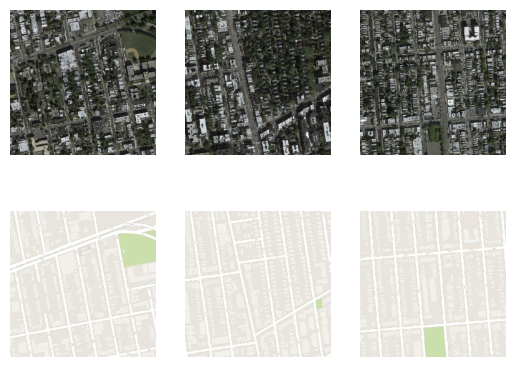

In [12]:
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

In [16]:
data = [src_images, tar_images]
[X1, X2] = data
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict([src_image, tar_image, gen_image])
plot_images(src_image, gen_image, tar_image)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [19]:
import tensorflow as tf

In [21]:
print(tf.__version__)

2.10.0
